# Vineeta J Gupta, 
## GRIP, Sparks Foundation Internship

# Exploratory data analysis for task #5 IPL
  

## Loading necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Creating dataFrames 

In [2]:
match = pd.read_csv('matches.csv')
match.set_index('id', inplace=True)
match

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [3]:
match.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [4]:
delivery = pd.read_csv('deliveries.csv')
delivery.set_index('match_id', True)
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Cleaning our data

In [5]:
match.isna().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
match = match.dropna()

In [7]:
match

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould


In [8]:
delivery.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [9]:
delivery = delivery.dropna(axis=1)

In [10]:
delivery.isna().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [11]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


## 1. Which season had the most number of matches?

In [12]:
match.season.unique()

array([2018, 2019], dtype=int64)

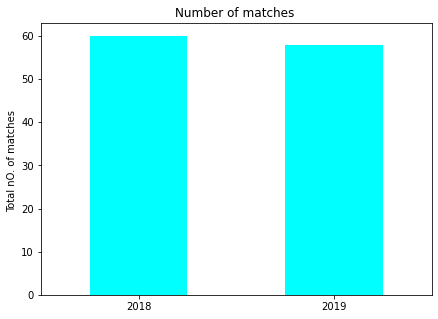

In [13]:
ax = match.season.value_counts().plot(kind= 'bar', color= 'cyan', figsize=(7,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_ylabel('Total nO. of matches ')
ax.set_title("Number of matches ")
plt.show()

## 2. Which city and venue accomodated the most number of matches untill now?

In [14]:
city = pd.DataFrame(match.groupby(['city', 'venue']).count()['result']).reset_index()
city['Grouped'] = city['city']+ ' , ' + city['venue'] 
city

,city,venue,result,Grouped
0,Bengaluru,M Chinnaswamy Stadium,7,"Bengaluru , M Chinnaswamy Stadium"
1,Bengaluru,M. Chinnaswamy Stadium,6,"Bengaluru , M. Chinnaswamy Stadium"
2,Chennai,M. A. Chidambaram Stadium,8,"Chennai , M. A. Chidambaram Stadium"
3,Chennai,"MA Chidambaram Stadium, Chepauk",1,"Chennai , MA Chidambaram Stadium, Chepauk"
4,Delhi,Feroz Shah Kotla,7,"Delhi , Feroz Shah Kotla"
5,Delhi,Feroz Shah Kotla Ground,7,"Delhi , Feroz Shah Kotla Ground"
6,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",7,"Hyderabad , Rajiv Gandhi International Stadium..."
7,Hyderabad,Rajiv Gandhi Intl. Cricket Stadium,8,"Hyderabad , Rajiv Gandhi Intl. Cricket Stadium"
8,Indore,Holkar Cricket Stadium,4,"Indore , Holkar Cricket Stadium"
9,Jaipur,Sawai Mansingh Stadium,14,"Jaipur , Sawai Mansingh Stadium"


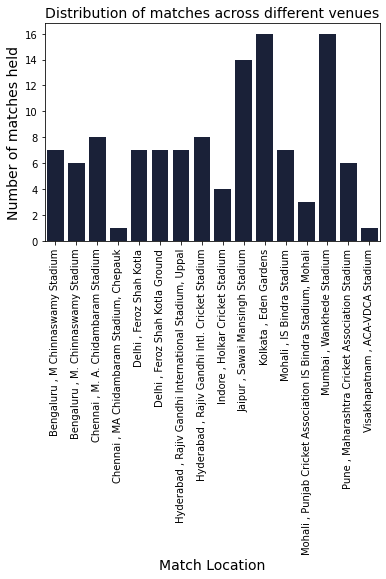

In [15]:
sns.barplot(city.Grouped, city.result, data=city, color= '#151e3d')
plt.xticks(rotation=90)
plt.xlabel('Match Location', size=14)
plt.ylabel('Number of matches held', size = 14)
plt.title('Distribution of matches across different venues', size =14)
plt.show()

## 3. Which team is the strongest ?

In [16]:
match.winner.value_counts()

Chennai Super Kings            21
Mumbai Indians                 17
Sunrisers Hyderabad            16
Kolkata Knight Riders          15
Rajasthan Royals               12
Kings XI Punjab                12
Royal Challengers Bangalore    11
Delhi Capitals                  9
Delhi Daredevils                5
Name: winner, dtype: int64

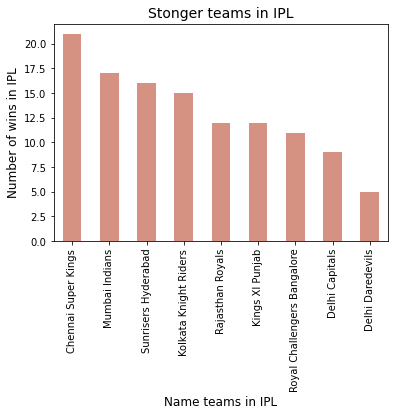

In [17]:
ax = match.winner.value_counts().plot(kind= 'bar', color = '#d59181')
ax.set_xlabel('Name teams in IPL', size =12)
ax.set_ylabel('Number of wins in IPL', size =12)
ax.set_title('Stonger teams in IPL', size = 14)
plt.show()

## 4. What does the toss result accomodate for the most? Fielding and batting ?

In [18]:
toss = pd.DataFrame(match.toss_decision.value_counts(normalize=True)*100).reset_index()
toss = toss.rename(columns={'index':'Preference', 'toss_decision':'Percentage'})
toss

,Preference,Percentage
0,field,83.050847
1,bat,16.949153


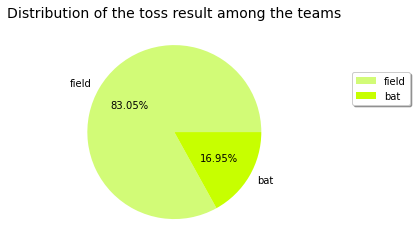

In [19]:
color = ['#d2fb77', '#c7ff00']
plt.pie(toss.Percentage, labels=toss.Preference, autopct= '%2.2f%%', colors= color)
plt.legend(toss.Preference, loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.title('Distribution of the toss result among the teams', size=14 )
plt.show()

## 5. Which player should be endorsed for an advertisement ? 


In [20]:
pl = pd.DataFrame(match.groupby(match.winner)['player_of_match'].value_counts() )
pl = pl.rename(columns = {'player_of_match' : 'total'})
pl = pl.sort_values(by='total', ascending=False).reset_index().head(10)
pl

,winner,player_of_match,total
0,Chennai Super Kings,SR Watson,5
1,Kolkata Knight Riders,AD Russell,5
2,Sunrisers Hyderabad,Rashid Khan,5
3,Royal Challengers Bangalore,AB de Villiers,5
4,Rajasthan Royals,JC Buttler,4
5,Chennai Super Kings,MS Dhoni,4
6,Mumbai Indians,HH Pandya,4
7,Mumbai Indians,JJ Bumrah,4
8,Kings XI Punjab,KL Rahul,4
9,Kolkata Knight Riders,SP Narine,3


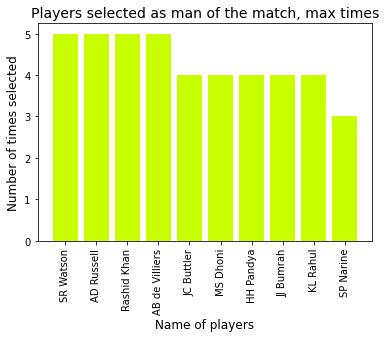

In [21]:
plt.bar(pl.player_of_match, pl.total , color= '#c7ff00')
plt.xticks(rotation=90)
plt.xlabel('Name of players', size=12)
plt.ylabel('Number of times selected', size =12)
plt.title('Players selected as man of the match, max times', size=14)
plt.show()

## 6. Distribution of winners according to bowl or bat 

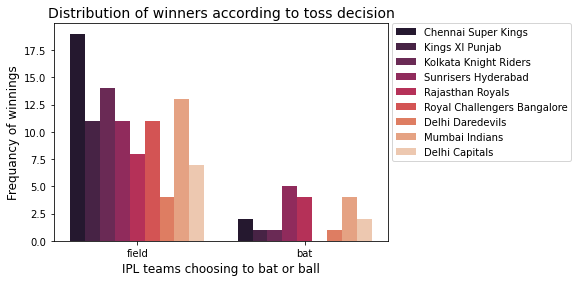

In [22]:
sns.countplot('toss_decision', data=match, hue= 'winner', palette='rocket')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('IPL teams choosing to bat or ball', size=12)
plt.ylabel('Frequancy of winnings', size=12)
plt.title('Distribution of winners according to toss decision', size=14)
plt.show()

## 7. Winners of each season  

In [23]:
w = pd.DataFrame(match.drop_duplicates(subset=['season'], keep='last')).reset_index()
pd.DataFrame(w.groupby(['season'])['winner'].max()).reset_index().stack()

0  season                   2018
   winner    Chennai Super Kings
1  season                   2019
   winner         Mumbai Indians
dtype: object

## 8. What does the teams prefer the most? Bat or Bowl first?

In [24]:
# match['win_how'] = numpy.where(match.win_by_runs > 0, 'Batted', 'Bowled')
match['win_how'] = ' '
match.loc[(match.win_by_runs >= 1 , 'win_how')] = 'Batted'
match.loc[(match.win_by_runs < 1 , 'win_how')] = 'Bowled'
match.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_how
id,,,,,,,,,,,,,,,,,,
7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary,Bowled
7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon,Bowled
7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi,Bowled
7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan,Bowled
7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore,Bowled


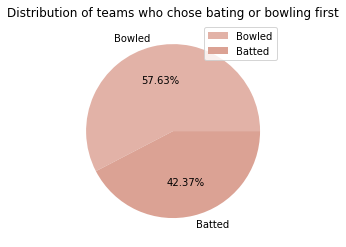

In [25]:
how = pd.DataFrame(match.win_how.value_counts(normalize=True)*100)
color = ['#e2b2a7', '#dba294']
plt.pie(how.win_how, labels=how.index,  autopct= '%2.2f%%', colors=color)
plt.legend(how.index)
plt.title('Distribution of teams who chose bating or bowling first')
plt.show()

## 9. The number of times the toss winning time won the match?

In [26]:
match.loc[(match.winner == match.toss_winner)].count()['result']

67

## 10. Number of bowls played by each team 

In [27]:
delivery.groupby(delivery.bowling_team)['ball'].count()

bowling_team
Chennai Super Kings            19556
Deccan Chargers                 9039
Delhi Capitals                  1963
Delhi Daredevils               18725
Gujarat Lions                   3545
Kings XI Punjab                20782
Kochi Tuskers Kerala            1614
Kolkata Knight Riders          20940
Mumbai Indians                 22517
Pune Warriors                   5457
Rajasthan Royals               17382
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Royal Challengers Bangalore    21236
Sunrisers Hyderabad            12779
Name: ball, dtype: int64

## 11. Top 5 batsman of IPL

In [28]:
run = pd.DataFrame(delivery.groupby([delivery.batting_team, delivery.batsman]).count()['total_runs'])
run = run.sort_values(by = 'total_runs',ascending=False).reset_index()
run

,batting_team,batsman,total_runs
0,Royal Challengers Bangalore,V Kohli,4211
1,Chennai Super Kings,SK Raina,3413
2,Mumbai Indians,RG Sharma,2907
3,Chennai Super Kings,MS Dhoni,2837
4,Kolkata Knight Riders,G Gambhir,2533
...,...,...,...
930,Kolkata Knight Riders,P Raj,1
931,Delhi Capitals,S Lamichhane,1
932,Kings XI Punjab,NJ Rimmington,1
933,Kochi Tuskers Kerala,P Parameswaran,1


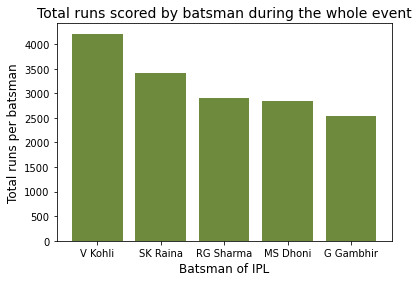

In [29]:
plt.bar(run.batsman[0:5], run.total_runs[0:5], color='#6e8b3d')
plt.xlabel('Batsman of IPL', size=12)
plt.ylabel('Total runs per batsman', size=12)
plt.title('Total runs scored by batsman during the whole event', size=14)
plt.xticks(rotation=0)
plt.show()

## 12. Which player has lasted through a whole match and made 200 runs in IPL?

In [30]:
delivery.loc[(delivery.over == 20) & (delivery.batsman_runs.cumsum() == 200)][['batsman', 'batting_team', 'over']]

,batsman,batting_team,over
124,BCJ Cutting,Sunrisers Hyderabad,20


## 13. Which players have hit a 6 throughout IPL the most?

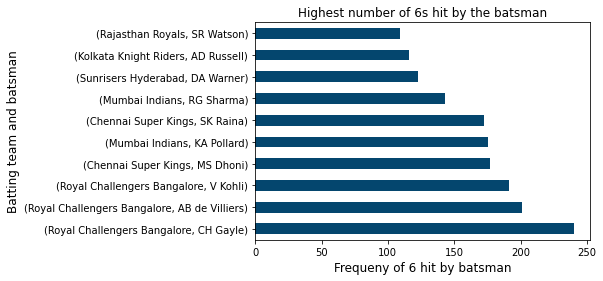

In [31]:
six = pd.DataFrame(delivery.loc[delivery.batsman_runs == 6])
ax = six.groupby([six.batting_team])['batsman'].value_counts().sort_values(ascending=False)[0:10].plot(kind='barh', color='#04466e')
ax.set_xlabel('Frequeny of 6 hit by batsman', size=12)
ax.set_ylabel('Batting team and batsman', size=12)
ax.set_title('Highest number of 6s hit by the batsman')
plt.show()

## 14. Which players hit a 4 the most throughout the IPL tournament?

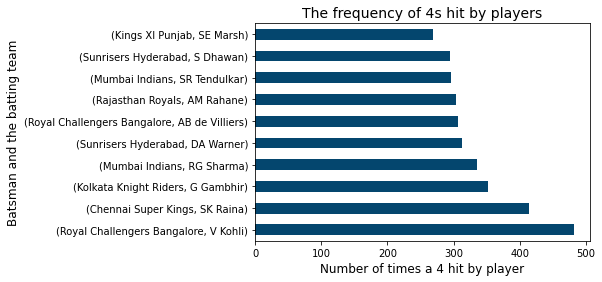

In [32]:
four = delivery.loc[delivery.batsman_runs == 4]
ax = four.groupby(['batting_team'])['batsman'].value_counts().sort_values(ascending=False)[0:10].plot(kind='barh', color='#04466e')
ax.set_xlabel('Number of times a 4 hit by player', size =12)
ax.set_ylabel('Batsman and the batting team', size=12)
ax.set_title('The frequency of 4s hit by players', size =14)
plt.show()

## 15. Which pair of batsman is the most famous ?


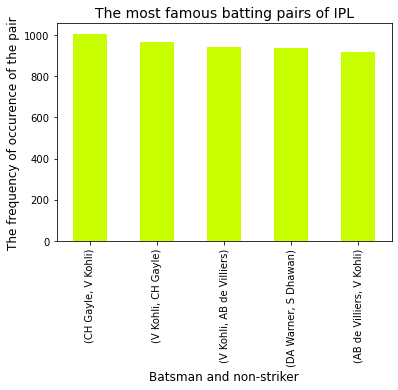

In [33]:
ax = delivery.groupby([delivery.batsman, delivery.non_striker]).count()['total_runs'].sort_values(ascending=False)[0:5].plot(kind='bar', color= '#c7ff00')
ax.set_xlabel('Batsman and non-striker', size =12)
ax.set_ylabel('The frequency of occurence of the pair', size=12)
ax.set_title('The most famous batting pairs of IPL', size=14)
plt.show()

## Correlation between several factors in cricket

In [34]:
mat = delivery.corr()

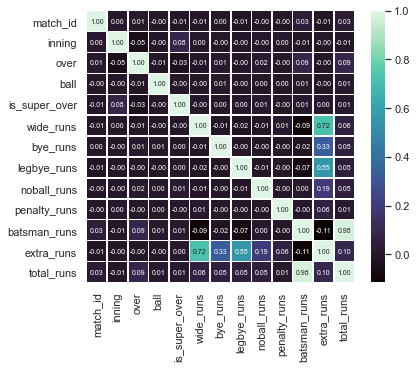

In [68]:
sns.heatmap(mat, cmap = 'mako', annot=True, annot_kws={'size': 7},  linewidths=.5,  fmt='.2f')
#plt.figure(dpi=80, figsize=(10,10))
sns.set(rc = {'figure.figsize':(6,5)})
